## Data Exploration

### Column Names and Descriptions for King County Data Set
**id** - Unique identifier for a house  
**date** - Date house was sold  
**price** - Sale price (prediction target)  
**bedrooms** - Number of bedrooms  
**bathrooms** - Number of bathrooms  
**sqft_living** - Square footage of living space in the home  
**sqft_lot** - Square footage of the lot  
**floors** - Number of floors (levels) in house  
**waterfront** - Whether the house is on a waterfront  
**view** - Quality of view from house  
**condition** - How good the overall condition of the house is. Related to maintenance of house. See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code  
**grade** - Overall grade of the house. Related to the construction and design of the house. See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code  
**sqft_above** - Square footage of house apart from basement  
**sqft_basement** - Square footage of the basement  
**yr_built** - Year when house was built  
**yr_renovated** - Year when house was renovated  
**zipcode** - ZIP Code used by the United States Postal Service  
**lat** - Latitude coordinate  
**long** - Longitude coordinate  
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors  
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors  

In [1]:
#import libraries & modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#checking available files 
!ls

Phase 2 Project.ipynb
README.md
data


In [3]:
#opening the king county housing data 
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#getting data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation

In [6]:
#checking null values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#dropping 'yr_renovated' and 'waterfront' because they are missing
#more than 10% of their entries 
#dropping 'id' because its a unique identifier
#dropping 'date' because its not needed for this analysis
#dropping null values remaining 

data.drop('yr_renovated', axis=1, inplace=True)
data.drop('waterfront', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data = data.dropna()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


King County Hardiness Zones 

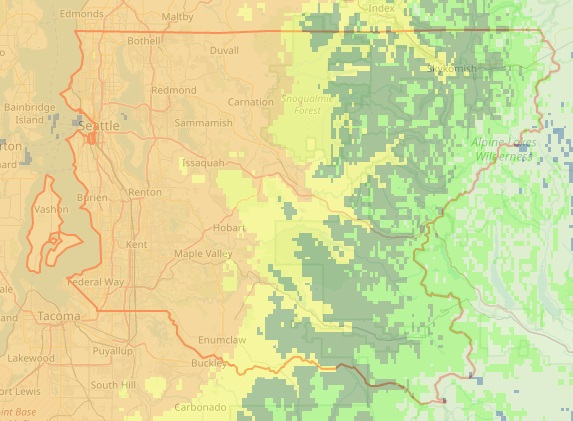

### Data Engineering 

In [8]:
#taking the absolute value of the longitude 
data['long'] = data['long'].abs()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503


In [9]:
#creating zones based on hardiness 
# 8b = 4, 8a = 3, 7b = 2, 7a = 1
x = data['long'].tolist()
res = ["4" if i > 122.2 
       else "3" if i > 122.0 
       else "2" if i > 121.6
       else "1"for i in x]
data['zone'] = res
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zone
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650,4
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639,4
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062,4
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000,4
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503,3


def group_zone(long_list):
    if long_list[0] < -122.2:
        return '8b'
    elif long_list[0] < -122.0 and long_list[0] > -121.6:
        return '8a'
    elif long_list[0] < -121.6 and long_list[0] > -121.4:
        return '7b'
    else: 
        return '7a'
    
data.apply(lambda row: group_zone(row), axis=1)
data['zone'] = data.apply(lambda row: group_zone(row), axis=1)
data.head()

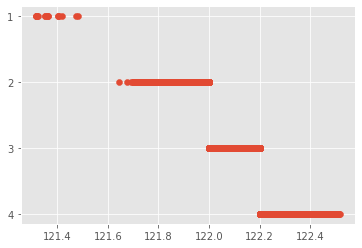

In [10]:
#using a scatter plot to visually assure the zones are correct
X = data['long']
Y = data['zone']
plt.scatter(X,Y)

In [11]:
#converting data type to integer
data['zone'] = data['zone'].astype(str).astype(int)

In [12]:
#limiting the dataset to show homes only in zone 4
data = data[data['zone'] > 3]
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zone
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.0
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,98104.533841,47.577112,122.314984,1791.730993,7942.623455,4.0
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,54.793028,0.137439,0.057081,586.524152,11978.930863,0.0
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,98001.000000,47.257400,122.201000,460.000000,651.000000,4.0
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,98055.000000,47.499200,122.279000,1385.500000,4560.000000,4.0
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,98116.000000,47.602800,122.317000,1660.000000,6600.000000,4.0
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,98136.000000,47.687200,122.361000,2060.000000,8760.000000,4.0
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,98199.000000,47.777600,122.519000,5500.000000,380279.000000,4.0


In [13]:
#dropping lat, long, and zipcode because they are similar to zone
data.drop('lat', axis=1, inplace=True)
data.drop('long', axis=1, inplace=True)
data.drop('zipcode', axis=1, inplace=True)

In [14]:
#engineering columns that contain size of lawn 
data['sqft_lawn'] = data['sqft_lot'].subtract(data['sqft_living'])
data['sqft_lawn15'] = data['sqft_lot15'].subtract(data['sqft_living15'])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,zone,sqft_lawn,sqft_lawn15
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.0,12219.000000,12219.000000
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,1791.730993,7942.623455,4.0,6792.780751,6150.892463
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,586.524152,11978.930863,0.0,17866.404299,11897.923209
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,460.000000,651.000000,4.0,-1900.000000,-1363.000000
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,1385.500000,4560.000000,4.0,2496.000000,2792.500000
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,1660.000000,6600.000000,4.0,4819.000000,4920.000000
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,2060.000000,8760.000000,4.0,7230.000000,7020.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,5500.000000,380279.000000,4.0,839659.000000,378429.000000


In [15]:
#engineering columns that show lawn as percentage of the lot 
data['sqft_lawn_prct'] = data['sqft_lawn']/data['sqft_lot']
data['sqft_lawn_prct15'] = data['sqft_lawn15']/data['sqft_lot15']
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zone,sqft_lawn,sqft_lawn15,sqft_lawn_prct,sqft_lawn_prct15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,1340,5650,4,4470,4310,0.791150,0.762832
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1690,7639,4,4672,5949,0.645126,0.778767
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,2720,8062,4,9230,5342,0.923000,0.662615
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000,4,3040,3640,0.608000,0.728000
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7 Average,1715,?,1995,2238,6819,4,5104,4581,0.748497,0.671799


In [16]:
#dropping sqft_lawn & sqft_lawn15
#as sqft_lawn_prct & sqft_lawn_prct15
#dropping zone because it was just needed to limit the dataset 

data.drop('sqft_lawn', axis=1, inplace=True)
data.drop('sqft_lawn15', axis=1, inplace=True)
data.drop('zone', axis=1, inplace=True)

In [17]:
#checking null values
data.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
sqft_living15       0
sqft_lot15          0
sqft_lawn_prct      0
sqft_lawn_prct15    0
dtype: int64

In [18]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,sqft_lawn_prct,sqft_lawn_prct15
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,1791.730993,7942.623455,0.632104,0.662622
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,586.524152,11978.930863,0.301527,0.243491
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,460.000000,651.000000,-3.653846,-0.985354
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,1385.500000,4560.000000,0.553193,0.609488
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,1660.000000,6600.000000,0.733333,0.738720
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,2060.000000,8760.000000,0.825000,0.811277
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,5500.000000,380279.000000,0.997093,0.996988


## Modeling 

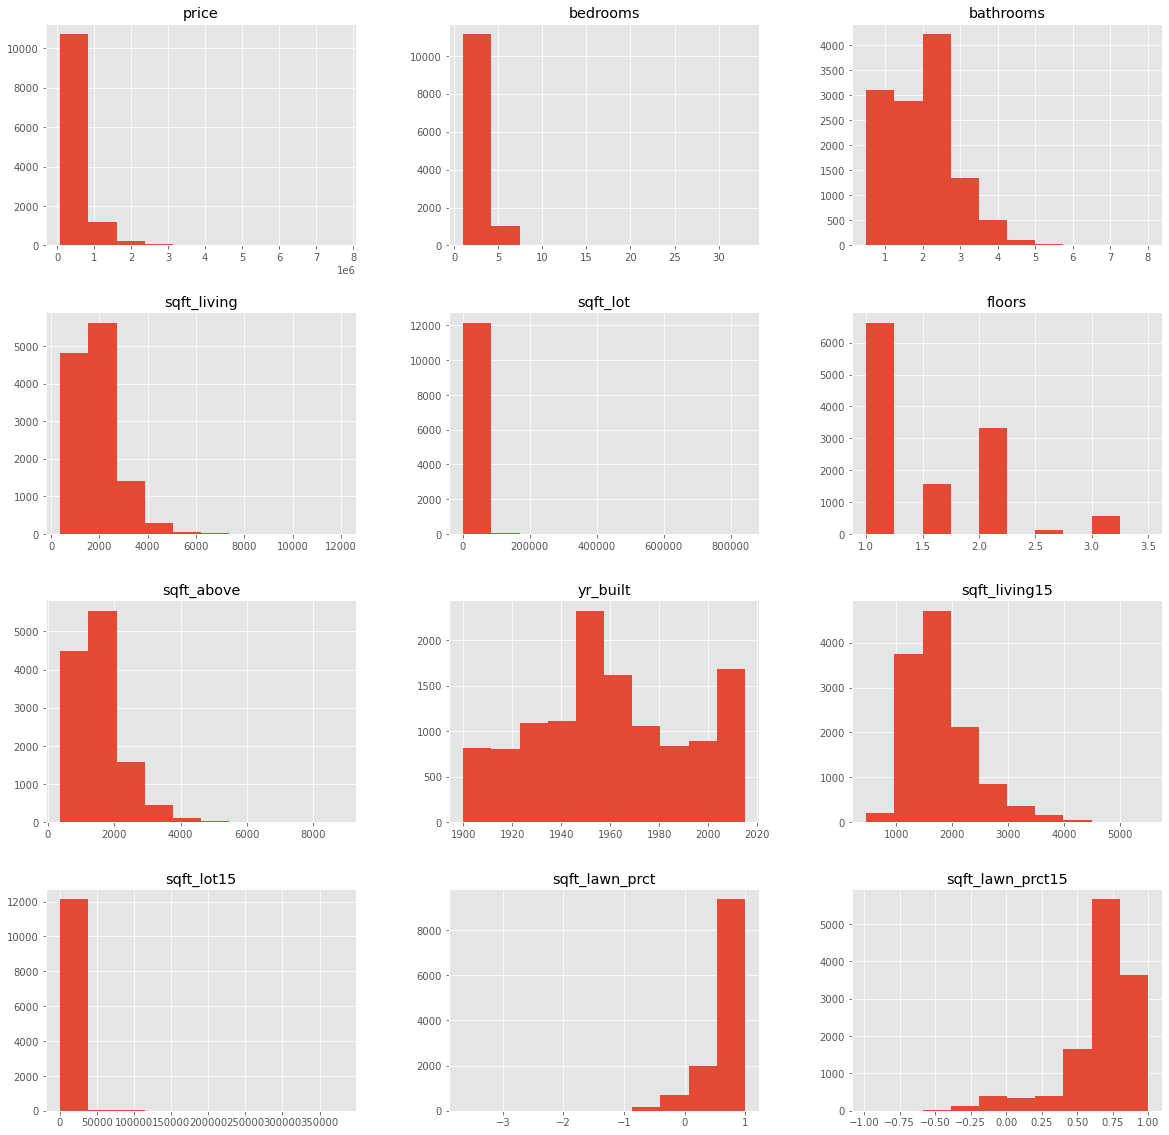

In [19]:
#Visually inspecting the data using histograms 
data.hist(figsize=(20,20));

"Many of the variables do not follow a normal distribution, and the scales are dramatically different for some variables. This may create issues with satisfying all regression assumptions, but we'll address those issues as they arise. Regression does not require features to be normally distributed."

"Given from the histogram: The saleprice has appreciable positive skewness, deviates from the normal distribution and shows peakedness. Let's take a look at the skewness and kurtosis in numbers:"

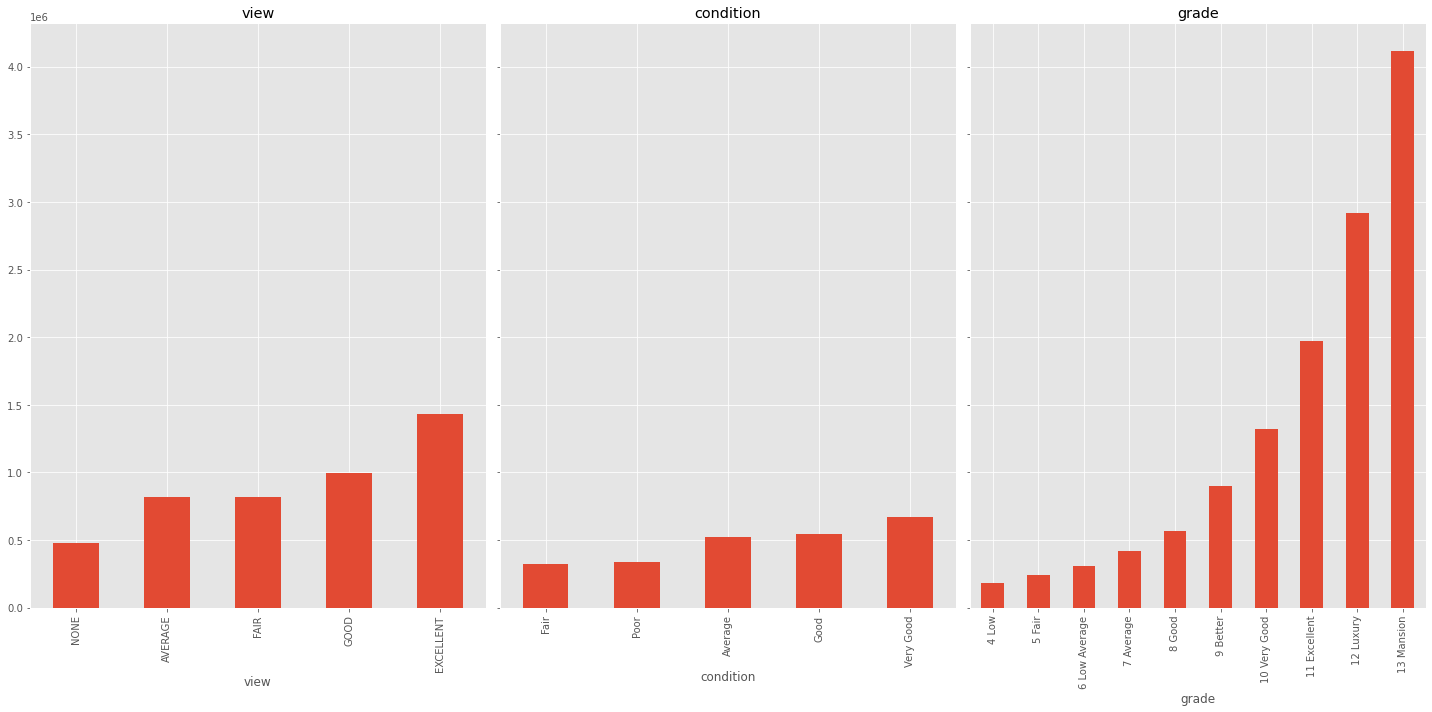

In [20]:
#plotting categorical variables 
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

categoricals = ['view', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)               # group values together by column of interest
         .mean()['price']            #take the mean of the price for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [21]:
#dummy enconding categorical variables 
dummies = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)
data = data.drop(categoricals, axis=1)
data = pd.concat([data, dummies], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,1340,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1690,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,2720,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,1360,...,1,0,0,0,0,0,0,1,0,0
6,257500.0,3,2.25,1715,6819,2.0,1715,?,1995,2238,...,0,0,0,0,0,0,0,1,0,0


In [22]:
#renaming grade columns to contain no spaces 
data.rename(columns={'grade_11 Excellent': 'grade_Excellent', 'grade_12 Luxury': 'grade_Luxury', 'grade_13 Mansion': 'grade_Mansion', 'grade_4 Low': 'grade_Low', 'grade_5 Fair': 'grade_Fair','grade_6 Low Average': 'grade_Low_Average','grade_7 Average': 'grade_Average','grade_8 Good': 'grade_Good','grade_9 Better': 'grade_Better'}, inplace=True)

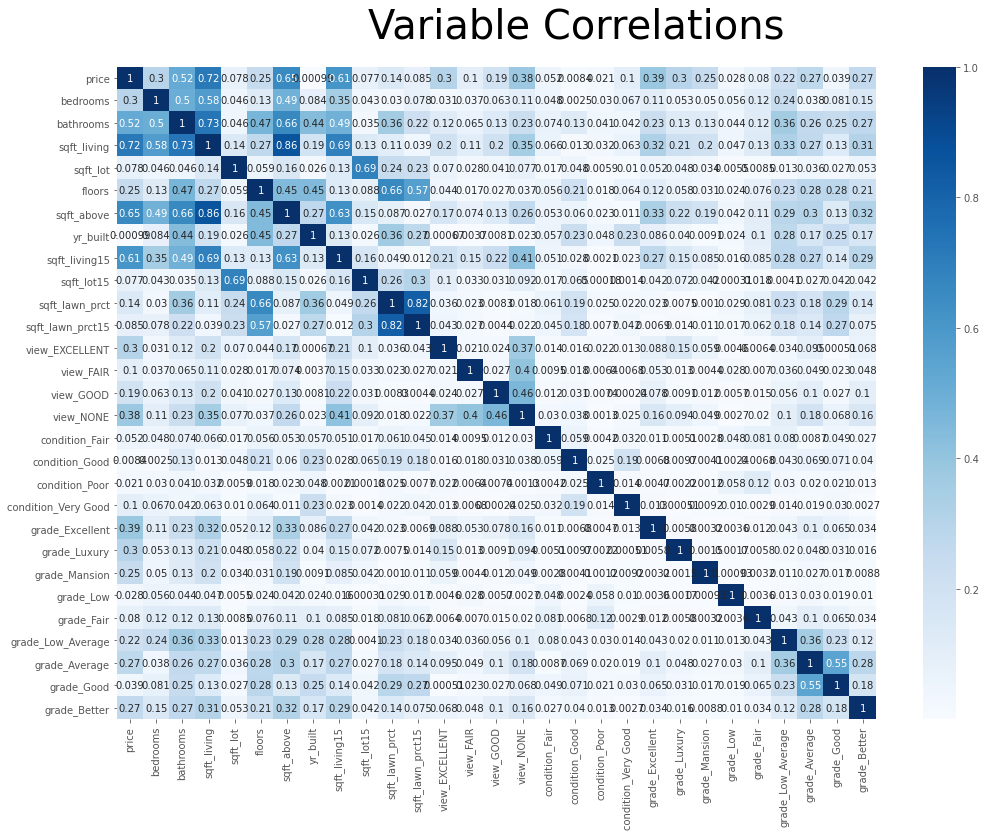

In [23]:
#checking variable correlations 
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

In [24]:
#creating list of features and correlations 
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [25]:
#checking for multicollinearity
MC_Features = []
MC_Corr = []
def check_MC(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .74 and idx != feature:
            MC_Features.append([feature, idx])
            MC_Corr.append(correlation)
            
for feature in corr:
    check_MC(feature)
MC_df = pd.DataFrame({'Correlations':MC_Corr, 'Features': MC_Features}).sort_values(by=['Correlations'], ascending=False)

In [26]:
#printing variable
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
1,0.720040,sqft_living
2,0.653637,sqft_above
3,0.612030,sqft_living15
0,0.517365,bathrooms
6,0.385658,grade_Excellent
5,0.381624,view_NONE
4,0.302921,view_EXCELLENT
7,0.300534,grade_Luxury


Multicollinear Features


,Correlations,Features
0,0.859438,"[sqft_living, sqft_above]"
1,0.859438,"[sqft_above, sqft_living]"
2,0.817622,"[sqft_lawn_prct, sqft_lawn_prct15]"
3,0.817622,"[sqft_lawn_prct15, sqft_lawn_prct]"


"We'll now make some scatterplots to visually explore the relationship between these variables and price. Linear regression analysis also assumes that the relationship between explanatory and response variables is linear. These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms and grade. This yields an opportunity for to combine features. Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models"

In [27]:
#removing sqft_above because it's multicollinear with sqft_living
Model_nl = smf.ols(formula='price ~ sqft_living15 + sqft_living + sqft_lawn_prct + bedrooms + grade_Excellent + view_NONE + view_EXCELLENT + grade_Luxury', data=data).fit()
Model_nl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2585.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:18:05   Log-Likelihood:            -1.6926e+05
No. Observations:               12219   AIC:                         3.385e+05
Df Residuals:                   12210   BIC:                         3.386e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.147e+05   1.41e+04      8.142      0.000    8.71e+04    1.42e+05
sqft_living15     128.4134      5.650     22.726      0.000     117.338     139.489
sqft_living       244.6905      4.518     54.163      0.000     235.835     253.546
sqft_lawn_prct  -1.379e+05   7726.987    -17.841      0.000   -1.53e+05   -1.23e+05
bedrooms        -4.263e+04   2859.527    -14.908      0.000   -4.82e+04    -3.7e+04
grade_Excellent  6.036e+05   2.22e+04     27.189      0.000     5.6e+05    6.47e+05
view_NONE       -6.926e+04   7963.620     -8.696      0.000   -8.49e+04   -5.36e+04
view_EXCELLENT   3.376e+05   1.81e+04     18.686      0.000    3.02e+05    3.73e+05
grade_Luxury     1.163e+06   4.55e+04     25.566      0.000    1.07e+06    1.25e+06
==============================================================================
Omnibus:                     6558.399   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269028.535
Skew:                           1.911   Prob(JB):                         0.00
Kurtosis:                      25.667   Cond. No.                     5.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

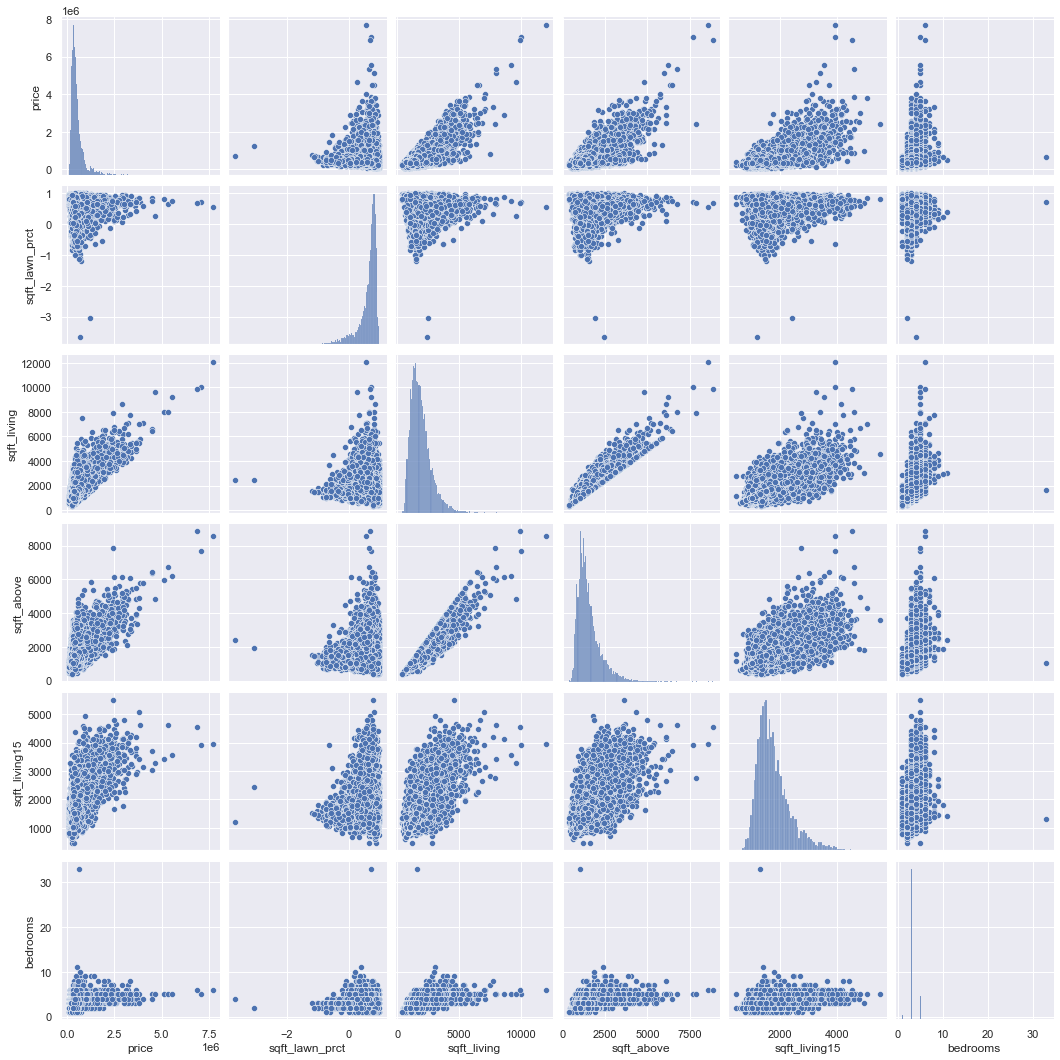

In [28]:
#checking most correlated variables visually for assumptions of linear regression 
sns.set()
cols = ['price', 'sqft_lawn_prct','sqft_living', 'sqft_above', 'sqft_living15', 'bedrooms']
sns.pairplot(data[cols], size = 2.5)
plt.show();

"The 'view', 'floors', and 'bedrooms' variables do not have a clear linear relationship with house price. Sqft living has a stronger linear relationship with price than sqft above, so it will be used in the multiple regression model. Due to its multicollinearity with sqft above, sqft above will be excluded."

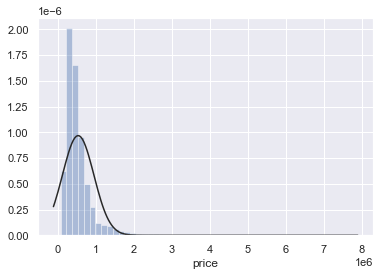

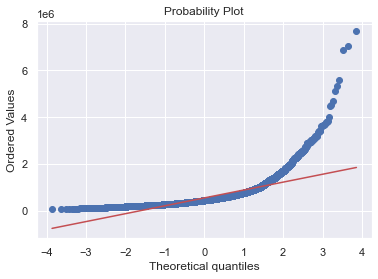

In [29]:
#checking price for assumptions of linear regression 
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [30]:
#applying log transformation
#fitting plot to normal distribution 
data['price'] = np.log(data['price'])

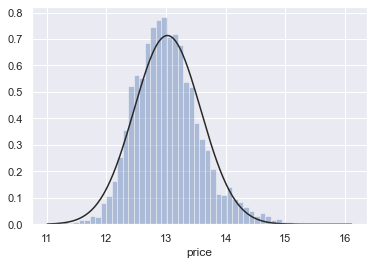

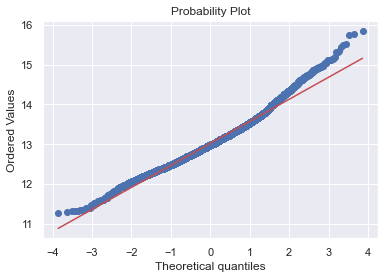

In [31]:
#transformed histogram and normal probability plot
sns.distplot(data['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

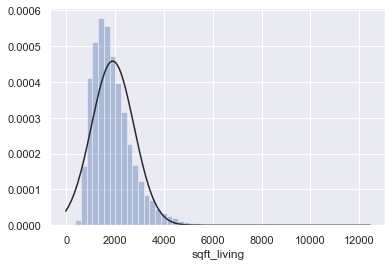

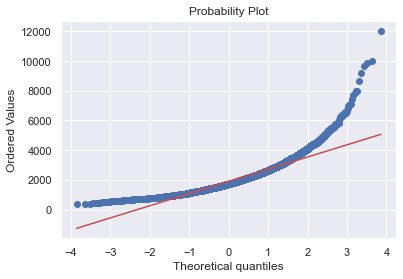

In [32]:
#histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

In [33]:
#data transformation
data['sqft_living'] = np.log(data['sqft_living'])

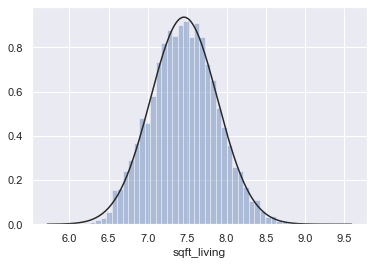

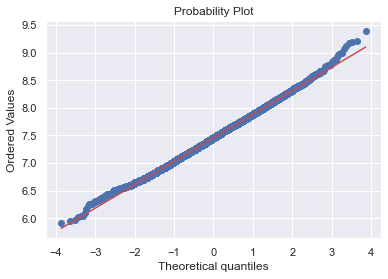

In [34]:
#transformed histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

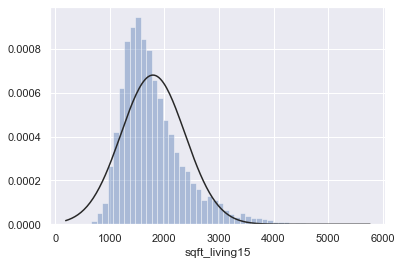

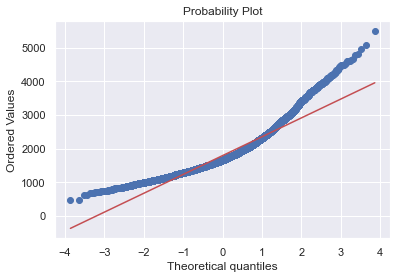

In [35]:
#histogram and normal probability plot
sns.distplot(data['sqft_living15'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living15'], plot=plt)

In [36]:
#data transformation
data['sqft_living15'] = np.log(data['sqft_living15'])

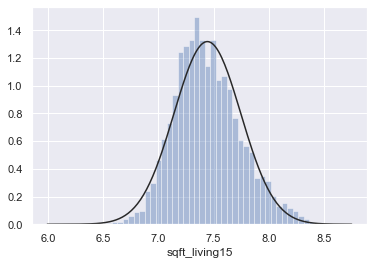

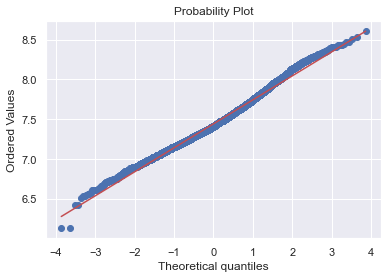

In [37]:
#histogram and normal probability plot
sns.distplot(data['sqft_living15'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living15'], plot=plt)

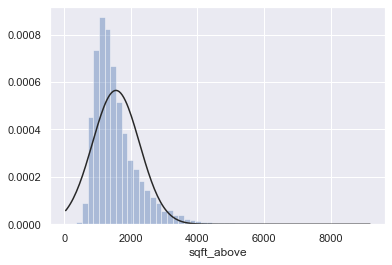

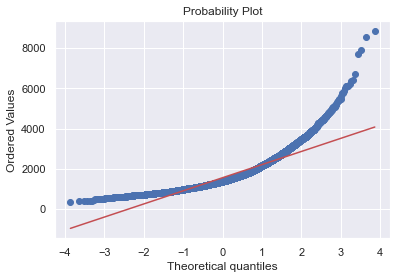

In [38]:
#histogram and normal probability plot
sns.distplot(data['sqft_above'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_above'], plot=plt)

In [39]:
#data transformation
data['sqft_above'] = np.log(data['sqft_above'])

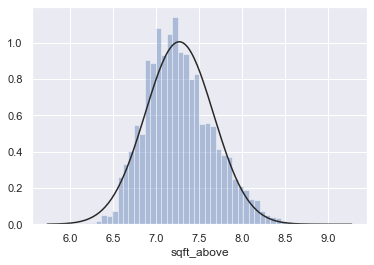

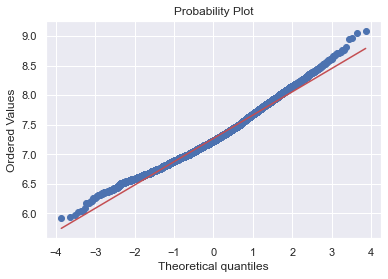

In [40]:
#histogram and normal probability plot
sns.distplot(data['sqft_above'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_above'], plot=plt)

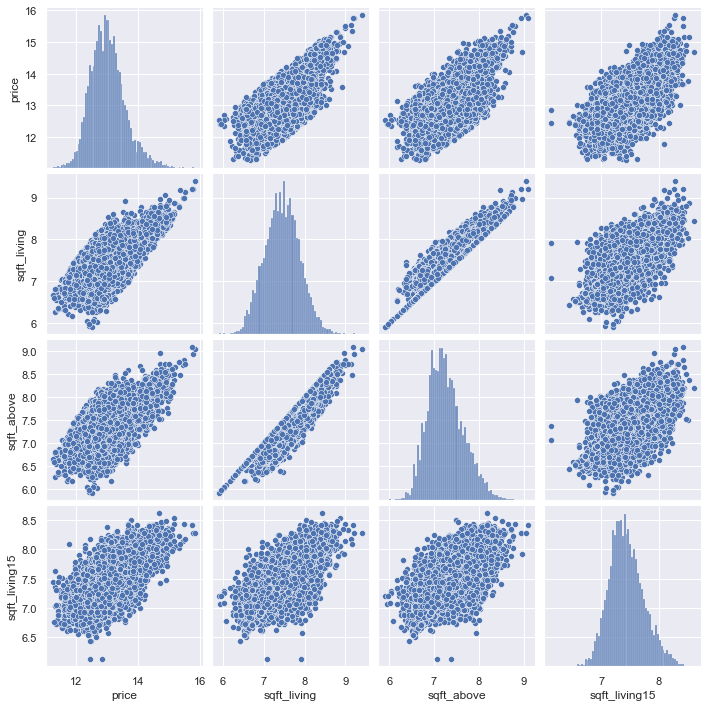

In [41]:
sns.set()
cols = ['price','sqft_living', 'sqft_above', 'sqft_living15']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [42]:
#creating model with variables most highly correlated with price 
#including sqft_lawn_prct because it is of concern to our stakeholder
Model_1 = smf.ols(formula='price ~ sqft_living + sqft_living15 + sqft_lawn_prct + sqft_above + bathrooms', data=data).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2282.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:18:22   Log-Likelihood:                -6208.3
No. Observations:               12219   AIC:                         1.243e+04
Df Residuals:                   12213   BIC:                         1.247e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1125      0.109     47.013      0.000       4.899       5.326
sqft_living        0.4992      0.019     26.323      0.000       0.462       0.536
sqft_living15      0.5454      0.017     32.561      0.000       0.513       0.578
sqft_lawn_prct    -0.3600      0.013    -26.781      0.000      -0.386      -0.334
sqft_above         0.0472      0.017      2.728      0.006       0.013       0.081
bathrooms          0.0061      0.007      0.826      0.409      -0.008       0.020
==============================================================================
Omnibus:                      149.444   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.812
Skew:                          -0.049   Prob(JB):                     4.25e-21
Kurtosis:                       2.582   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#replacing bathroom with bedroom because better p-value
Model_2 = smf.ols(formula='price ~ sqft_living + sqft_living15 + sqft_above + sqft_lawn_prct + bedrooms', data=data).fit()
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2329.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:18:22   Log-Likelihood:                -6146.9
No. Observations:               12219   AIC:                         1.231e+04
Df Residuals:                   12213   BIC:                         1.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.7268      0.096     49.278      0.000       4.539       4.915
sqft_living        0.5935      0.019     31.187      0.000       0.556       0.631
sqft_living15      0.5231      0.017     31.170      0.000       0.490       0.556
sqft_above         0.0507      0.017      2.966      0.003       0.017       0.084
sqft_lawn_prct    -0.3504      0.012    -28.224      0.000      -0.375      -0.326
bedrooms          -0.0523      0.005    -11.139      0.000      -0.062      -0.043
==============================================================================
Omnibus:                      107.450   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.092
Skew:                          -0.042   Prob(JB):                     2.22e-16
Kurtosis:                       2.633   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#removing sqft_above because it's multicollinear with sqft_living
Model_3 = smf.ols(formula='price ~ sqft_living15 + sqft_living + sqft_lawn_prct + bedrooms', data=data).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     2908.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:18:22   Log-Likelihood:                -6151.3
No. Observations:               12219   AIC:                         1.231e+04
Df Residuals:                   12214   BIC:                         1.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.7787      0.094     50.652      0.000       4.594       4.964
sqft_living15      0.5284      0.017     31.656      0.000       0.496       0.561
sqft_living        0.6306      0.014     43.959      0.000       0.602       0.659
sqft_lawn_prct    -0.3507      0.012    -28.241      0.000      -0.375      -0.326
bedrooms          -0.0522      0.005    -11.109      0.000      -0.061      -0.043
==============================================================================
Omnibus:                       98.289   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.296
Skew:                          -0.028   Prob(JB):                     4.02e-15
Kurtosis:                       2.643   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#adding highly correlated dummy variables 
Model_4 = smf.ols(formula='price ~ sqft_living15 + sqft_living + sqft_lawn_prct + bedrooms + grade_Excellent + view_NONE + view_EXCELLENT + grade_Luxury', data=data).fit()
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1703.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:18:22   Log-Likelihood:                -5659.4
No. Observations:               12219   AIC:                         1.134e+04
Df Residuals:                   12210   BIC:                         1.140e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3409      0.106     59.989      0.000       6.134       6.548
sqft_living15       0.4213      0.017     25.524      0.000       0.389       0.454
sqft_living         0.5430      0.014     38.619      0.000       0.515       0.571
sqft_lawn_prct     -0.3681      0.012    -30.804      0.000      -0.391      -0.345
bedrooms           -0.0337      0.005     -7.403      0.000      -0.043      -0.025
grade_Excellent     0.5288      0.033     16.013      0.000       0.464       0.594
view_NONE          -0.2005      0.012    -16.556      0.000      -0.224      -0.177
view_EXCELLENT      0.3075      0.028     11.117      0.000       0.253       0.362
grade_Luxury        0.7087      0.068     10.352      0.000       0.575       0.843
==============================================================================
Omnibus:                      147.458   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.875
Skew:                          -0.023   Prob(JB):                     1.85e-20
Kurtosis:                       2.580   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

"Now that we have transformed our dependent variable, we need to interpret our model coefficients differently.

When we perform a log transform on our dependent variable, we transform the relationship between it and the features into one more multiplicative than additive, so we need to express the marginal effect in terms of percent.

When we only log-transform the dependent variable, we exponentiate the coefficient, subtract one from this number, and multiply by 100.

This will yield the percent increase (or decrease) in the response for every one-unit increase in the independent variable.

So here we can use the age variable as an example, with a coefficient of 0.0347

Recall exponentiation is the inverse of the logarithm function, so we exponentiate the variable's coefficient, subtract it by 1 and multiply 100:""

In [73]:
#printing coefficient values  
print(Model_4.params)
sqft_living = (1.01)

Intercept          6.340875
sqft_living15      0.421263
sqft_living        0.543022
sqft_lawn_prct    -0.368062
bedrooms          -0.033695
grade_Excellent    0.528796
view_NONE         -0.200450
view_EXCELLENT     0.307521
grade_Luxury       0.708721
dtype: float64


Since price, sqft_living, and sqft_living15 were log transformed we need to undo the transformation to interpret the coefficients properly. 

sqft_living = (1.01^0.543022 - 1)*100 = 0.54%  
sqft_living15 = (1.01^0.421263 - 1)*100 = 0.42%   
sqft_lawn_prct = (-0.368062 * log(1.01)) = -0.00159053347  
bedrooms = (-0.033695 * log(1.01)) = -0.0001456  
grade_Excellent = (0.528796 * log(1.01)) = 0.00228512517  
view_NONE = (-0.200450 * log(1.01)) = -0.00086621937    
view_EXCELLENT = (0.307521 * log(1.01)) = 0.00132891318                  
grade_Luxury = (0.708721 * log(1.01)) = 0.00306264834     


In [46]:
#doing a 75/25 train/test split 
train, test = train_test_split(data)

In [47]:
#the train dataset 
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
20765,12.384219,2,1.50,6.522093,772,2.0,6.522093,0.0,2005,6.536692,...,0,0,0,0,0,0,0,1,0,0
1615,12.821258,3,2.75,7.130899,1655,2.0,6.721426,420.0,2006,7.326466,...,0,0,0,0,0,0,0,1,0,0
4619,13.937728,4,3.50,8.366370,8406,2.0,8.183118,720.0,1987,7.926603,...,0,1,0,0,0,0,0,0,0,0
170,12.556730,3,1.75,7.352441,21000,1.0,7.352441,0.0,1954,6.975414,...,0,0,0,0,0,0,0,1,0,0
2482,12.591335,3,1.00,7.185387,9520,1.0,6.897705,330.0,1953,7.286192,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8717,13.327750,4,2.75,7.922986,8160,1.5,7.484369,980.0,1940,7.908387,...,0,0,0,0,0,0,0,0,1,0
14289,12.314927,3,2.00,7.177782,8440,1.0,7.177782,0.0,1951,7.489971,...,1,0,0,0,0,0,1,0,0,0
2520,12.784090,4,2.50,7.851661,11473,2.0,7.851661,0.0,2008,7.795647,...,0,0,0,0,0,0,0,0,1,0
10652,13.022543,3,1.75,7.620705,15695,1.0,7.620705,?,1959,7.731931,...,0,0,0,0,0,0,0,0,1,0


In [48]:
#the test dataset 
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
2581,13.422468,3,1.75,7.444249,5913,1.0,7.021084,590.0,1941,7.979339,...,0,0,0,0,0,0,0,0,1,0
11855,12.468437,2,1.00,6.709304,6771,1.0,6.709304,0.0,1918,6.907755,...,0,0,0,0,0,0,1,0,0,0
3261,13.228524,3,1.75,7.371489,2500,1.5,7.081709,400.0,1908,7.258412,...,0,0,0,0,0,0,0,1,0,0
17908,11.652687,2,1.00,6.845880,6000,1.0,6.845880,0.0,1943,7.177782,...,0,0,0,0,0,0,1,0,0,0
4282,12.611538,3,2.75,7.554859,15508,1.0,7.098376,700.0,1984,7.803843,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19547,12.049419,4,2.00,7.326466,19672,1.0,6.927558,500.0,1920,7.501082,...,0,0,0,0,0,0,1,0,0,0
16922,12.891692,3,2.00,7.003065,9165,1.0,7.003065,0.0,1969,7.319865,...,0,0,0,0,0,0,0,1,0,0
8414,12.675920,5,1.75,7.444249,11900,1.0,6.975414,640.0,1958,6.937314,...,0,0,0,0,0,0,0,1,0,0
16038,13.304685,3,1.00,7.177782,5000,1.5,7.177782,0.0,1906,7.333023,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#using Model 4 variables for cross validation because it had the best R-squared value 

y = data[['price']]
X = data[['sqft_lawn_prct','sqft_living', 'sqft_living15', 'bedrooms', 'grade_Excellent', 'view_EXCELLENT', 'grade_Luxury', 'view_NONE']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
#X_train dataset 
X_train

,sqft_lawn_prct,sqft_living,sqft_living15,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE
16093,0.882269,7.185387,6.966024,4,0,0,0,1
122,0.871667,6.646391,7.444249,2,0,0,0,1
6019,0.486111,7.522941,7.585789,4,0,0,0,1
19984,-0.143376,7.138867,7.185387,3,0,0,0,1
21313,-0.306715,7.272398,7.272398,3,0,0,0,1
...,...,...,...,...,...,...,...,...
2828,0.569094,7.972466,7.770645,5,0,0,0,1
3154,0.884846,8.213382,7.745003,2,0,1,1,0
17365,0.701267,7.365180,7.177782,3,0,0,0,1
11829,0.878148,7.489971,7.799753,4,0,0,0,0


In [51]:
#splitting data into random train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
#fitting linear model with coeffiecients 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [53]:
#returning the RMSE by setting squared=False
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train, squared=False)
test_mse = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Root Mean Squared Error:', train_mse)
print('Test Root Mean Squared Error:', test_mse)

Train Root Mean Squared Error: 0.38425955767560604
Test Root Mean Squared Error: 0.3854383331379043


## Evaluation

References 
https://www.kaggle.com/code/henriqueyamahata/boston-housing-with-linear-regression    
https://www.kaggle.com/code/madislemsalu/predicting-housing-prices-in-king-county-usa    
https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb   
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/#:~:text=Interpret%20the%20coefficient%20as%20the,variable%20increases%20by%20about%200.20%25.